In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from  sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score,average_precision_score,classification_report

In [ ]:
df1 = pd.read_excel('/content/Copy of divya_ml_shark.xlsx')

In [ ]:
df2 = pd.read_excel('/content/additional_data_ml.xlsx')

In [ ]:
df1.columns

Index(['category', 'companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'prerevenue', 'B2B_B2C ', 'current_investors',
       'present_competitor', 'yearly_revenue', 'gross_margin',
       'shark_estimated_valuation', 'aman_gupta(in/out)', 'Anupam(in/out)',
       'ashneer(in/out)', 'Namita(in/out)', 'vineeta(in/out)',
       'shark_est_invest', 'shark_equity', 'no_of_shark_team_during_proposal',
       'no_of_shark_with_confirmed_deal', 'client_acceptance ', 'Domain',
       'market(%)', 'monthly_sales'],
      dtype='object')

In [ ]:
df2.columns

Index(['category', 'companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'prerevenue', 'B2B_B2C ', 'current_investors',
       'present_competitor', 'yearly_revenue', 'gross_margin',
       'shark_estimated_valuation', 'aman_gupta(in/out)', 'Anupam(in/out)',
       'ashneer(in/out)', 'Namita(in/out)', 'vineeta(in/out)',
       'no_of_shark_team_during_proposal', 'no_of_shark_with_confirmed_deal',
       'shark_fund', 'ROUND(INT)', 'client_acceptance',
       'shark equity(original)', 'shark est_equity(/100)'],
      dtype='object')

Data Preparation

In [ ]:
dct = {'ROUND(INT)':'shark_equity',
       'B2B_B2C ':'B2B_B2C',
 'shark_fund':'shark_est_invest'}

In [ ]:
df2 = df2.rename(dct,axis=1)

In [ ]:
df1 = df1.rename({'client_acceptance ':'client_acceptance','B2B_B2C ':'B2B_B2C'},axis=1)

In [ ]:
df2.columns

Index(['category', 'companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'prerevenue', 'B2B_B2C', 'current_investors',
       'present_competitor', 'yearly_revenue', 'gross_margin',
       'shark_estimated_valuation', 'aman_gupta(in/out)', 'Anupam(in/out)',
       'ashneer(in/out)', 'Namita(in/out)', 'vineeta(in/out)',
       'no_of_shark_team_during_proposal', 'no_of_shark_with_confirmed_deal',
       'shark_est_invest', 'shark_equity', 'client_acceptance',
       'shark equity(original)', 'shark est_equity(/100)'],
      dtype='object')

In [ ]:
df2_e = df2.drop(['shark equity(original)',
       'shark est_equity(/100)'],axis=1)

In [ ]:
df1_e = df1

In [ ]:
df_main = pd.concat([df1_e,df2_e])

In [ ]:
df_main.columns

Index(['category', 'companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'prerevenue', 'B2B_B2C', 'current_investors',
       'present_competitor', 'yearly_revenue', 'gross_margin',
       'shark_estimated_valuation', 'aman_gupta(in/out)', 'Anupam(in/out)',
       'ashneer(in/out)', 'Namita(in/out)', 'vineeta(in/out)',
       'shark_est_invest', 'shark_equity', 'no_of_shark_team_during_proposal',
       'no_of_shark_with_confirmed_deal', 'client_acceptance', 'Domain',
       'market(%)', 'monthly_sales'],
      dtype='object')

In [ ]:
l = ['Anupam(in/out)',
       'ashneer(in/out)', 'Namita(in/out)', 'vineeta(in/out)']
for i in l:
  df_main[i] = df_main[i].replace(['IN','OUT'],[1,0])
  print(df_main[i].unique())

[0 1]
[1 0]
[0 1]
[1 0]


In [ ]:
df_main['aman_gupta(in/out)'] = df_main['aman_gupta(in/out)'].replace(['IN','OUT'],[1,0])

In [ ]:
df_main.prerevenue.unique()

array(['no', 'yes', 'no '], dtype=object)

In [ ]:
df_main['prerevenue'] = df_main['prerevenue'].replace(['no '],'no')

In [81]:
df_main.shape

(137, 24)

In [ ]:
df_main['B2B_B2C'].unique()

array(['B2C ,B2B', 'B2C', 'prerevenue', '100% b2b', 'B2B', 'prerevenue '],
      dtype=object)

In [ ]:
df_main['B2B_B2C'] = df_main['B2B_B2C'].replace(['100% b2b','prerevenue '],['B2B', 'prerevenue'])

In [ ]:
df_without_categorical = df_main.drop(['category', 'B2B_B2C','prerevenue'],axis=1)

In [ ]:
df_main.client_acceptance.unique()

array(['aman, ashneer, vineeta', 'aman',
       'ashneer,  anupam , aman,vineeta', 'ashneer',
       'Namita,  Vineeta,  aman', 'Vineeta,ashneer', 'namita,ashneer',
       'no', 'aman,ashneer,vineeta', 'ALL OUT(LESS SCALING FACTOR)',
       'namita', 'ALL OUT(LESS MARKET)', 'ashneer,  anupam',
       'ashneer anupam ', 'namita vineeta ', 'ALL OUT(HIGH EVALUATION)',
       'vinneta', 'vineeta, anupam', 'ALL OUT(LESS MARGIN)',
       'aman,namita', 'aman, anupam', 'ALL OUT(LESS SCALING)',
       'all sharks', 'ashneer,aman', 'aman, ashneer', 'anupam,vineeta',
       'vineeta', 'anupam', 'aman,vineeta', 'ashneer,aman,vineeta',
       'anupam,namita', 'ALL SHARKS', 'aman,ashneer', 'ashneer,namita',
       'aman,anupam', 'namita,vineeta', 'ashneer,vineeta',
       'anupam,ashneer,vineeta'], dtype=object)

In [ ]:
df_out = df_main[(df_main['client_acceptance'] == 'ALL OUT(LESS SCALING FACTOR)') |
                 (df_main['client_acceptance'] ==  'ALL OUT(LESS MARKET)') |
                 (df_main['client_acceptance'] == 'ALL OUT(LESS MARGIN)' ) |
                 (df_main['client_acceptance'] == 'ALL OUT(HIGH EVALUATION)' ) |
                 (df_main['client_acceptance'] == 'ALL OUT(LESS SCALING)' ) 
                 ]

In [ ]:
df_out

,category,companyEvaluation _(in lakhs),client_est_fund,client_equity(in %),prerevenue,B2B_B2C,current_investors,present_competitor,yearly_revenue,gross_margin,...,Namita(in/out),vineeta(in/out),shark_est_invest,shark_equity,no_of_shark_team_during_proposal,no_of_shark_with_confirmed_deal,client_acceptance,Domain,market(%),monthly_sales
10,PUBLIC SERVICE,4000.0,100.0,2.5,no,B2C,0.0,3.0,72.0,30.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS SCALING FACTOR),elcare(senior citizen seva),0.50,6.0
11,FASHION,400.0,30.0,7.5,no,B2C,0.0,4.0,24.0,0.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS SCALING FACTOR),twee(fashion),0.20,2.0
14,FOOD,800.0,40.0,5.0,no,B2C,0.0,2.0,22.0,0.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS MARKET),mavi(beverage company),0.10,2.0
18,HOME SECURITY,2500.0,75.0,3.0,yes,B2B,0.0,4.0,180.0,0.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS MARKET),Astrix(smart lock),0.10,15.0
20,FLOWER,30000.0,300.0,1.0,no,B2C,0.0,3.0,900.0,29.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(HIGH EVALUATION),shades of spring(flowers),0.30,75.0
23,OTT,2857.0,100.0,3.5,no,B2C,1.0,2.0,1044.0,0.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS MARKET),PlayBox(allinOne_OTT),0.40,87.0
29,FOOD,500.0,50.0,10.0,no,B2B,3.0,6.0,60.0,18.33,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS MARGIN),jhaji pickle(food),0.30,5.0
32,FOOD,1000.0,50.0,5.0,no,B2C,0.0,5.0,40.0,0.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(LESS SCALING),Hungry head (food),0.80,6.0
35,CLOTH,10000.0,100.0,1.0,no,"B2C ,B2B",0.0,2.0,107.0,0.00,...,0,0,0.0,0.0,0.0,0.0,ALL OUT(HIGH EVALUATION),HECOLL clothing,0.35,9.0


In [ ]:
tdf_without_categorical.columns

Index(['companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'current_investors', 'present_competitor',
       'yearly_revenue', 'gross_margin', 'shark_estimated_valuation',
       'aman_gupta(in/out)', 'Anupam(in/out)', 'ashneer(in/out)',
       'Namita(in/out)', 'vineeta(in/out)', 'shark_est_invest', 'shark_equity',
       'no_of_shark_team_during_proposal', 'no_of_shark_with_confirmed_deal',
       'client_acceptance', 'Domain', 'market(%)', 'monthly_sales'],
      dtype='object')

Data Visualization

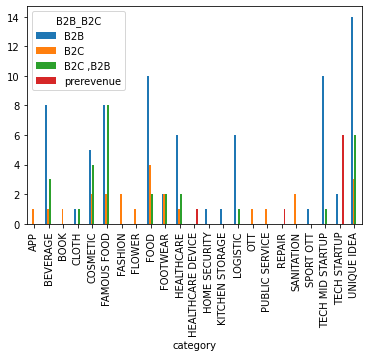

In [ ]:
cr0=pd.crosstab(index=df_main['category'],columns=df_main['B2B_B2C'])
cr0.plot.bar()

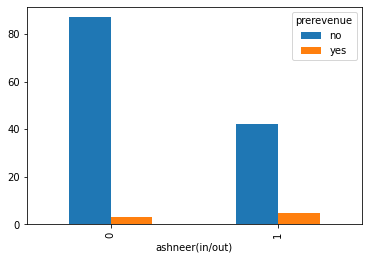

In [ ]:
cr1=pd.crosstab(index=df_main['ashneer(in/out)'],columns=df_main['prerevenue'])
cr1.plot.bar()

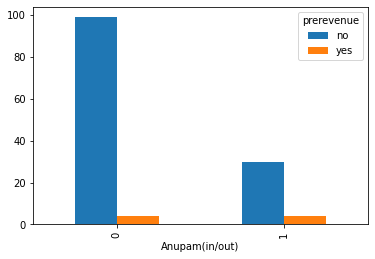

In [ ]:
cr4=pd.crosstab(index=df_main['Anupam(in/out)'],columns=df_main['prerevenue'])
cr4.plot.bar()

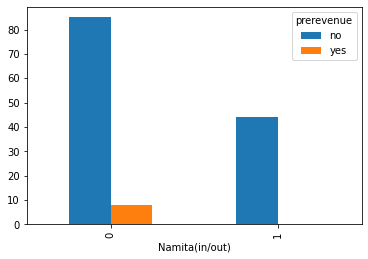

In [ ]:
cr2=pd.crosstab(index=df_main['Namita(in/out)'],columns=df_main['prerevenue'])
cr2.plot.bar()

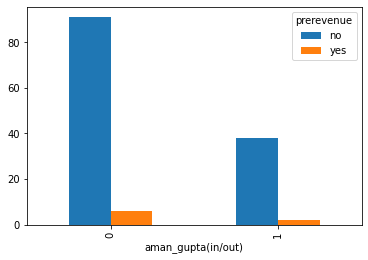

In [ ]:
cr4=pd.crosstab(index=df_main['aman_gupta(in/out)'],columns=df_main['prerevenue'])
cr4.plot.bar()

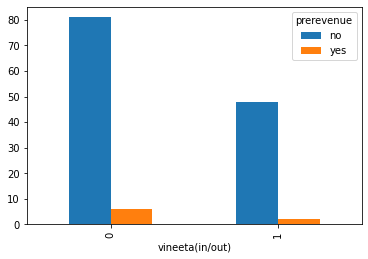

In [ ]:
cr3=pd.crosstab(index=df_main['vineeta(in/out)'],columns=df_main['prerevenue'])
cr3.plot.bar()

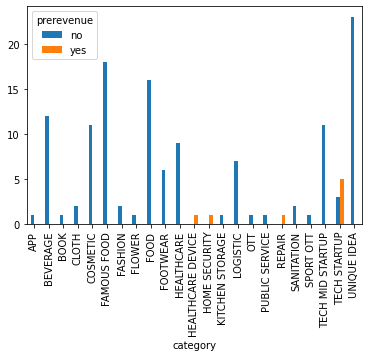

In [ ]:
cr1=pd.crosstab(index=df_main['category'],columns=df_main['prerevenue'])
cr1.plot.bar()

In [ ]:
categorical_one_hot_code = pd.get_dummies(df_main[['category', 'B2B_B2C','prerevenue']])

In [ ]:
categorical_one_hot_code.columns

Index(['category_APP', 'category_BEVERAGE', 'category_BOOK', 'category_CLOTH',
       'category_COSMETIC', 'category_FAMOUS FOOD', 'category_FASHION',
       'category_FLOWER', 'category_FOOD', 'category_FOOTWEAR',
       'category_HEALTHCARE', 'category_HEALTHCARE DEVICE',
       'category_HOME SECURITY', 'category_KITCHEN STORAGE',
       'category_LOGISTIC', 'category_OTT', 'category_PUBLIC SERVICE',
       'category_REPAIR', 'category_SANITATION', 'category_SPORT OTT',
       'category_TECH MID STARTUP', 'category_TECH STARTUP',
       'category_UNIQUE IDEA', 'B2B_B2C_B2B', 'B2B_B2C_B2C',
       'B2B_B2C_B2C ,B2B', 'B2B_B2C_prerevenue', 'prerevenue_no',
       'prerevenue_yes'],
      dtype='object')

In [ ]:
df_ctg = pd.concat([categorical_one_hot_code,df_without_categorical],axis=1)

In [ ]:
df_ctg.columns

Index(['category_APP', 'category_BEVERAGE', 'category_BOOK', 'category_CLOTH',
       'category_COSMETIC', 'category_FAMOUS FOOD', 'category_FASHION',
       'category_FLOWER', 'category_FOOD', 'category_FOOTWEAR',
       'category_HEALTHCARE', 'category_HEALTHCARE DEVICE',
       'category_HOME SECURITY', 'category_KITCHEN STORAGE',
       'category_LOGISTIC', 'category_OTT', 'category_PUBLIC SERVICE',
       'category_REPAIR', 'category_SANITATION', 'category_SPORT OTT',
       'category_TECH MID STARTUP', 'category_TECH STARTUP',
       'category_UNIQUE IDEA', 'B2B_B2C_B2B', 'B2B_B2C_B2C',
       'B2B_B2C_B2C ,B2B', 'B2B_B2C_prerevenue', 'prerevenue_no',
       'prerevenue_yes', 'companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'current_investors', 'present_competitor',
       'yearly_revenue', 'gross_margin', 'shark_estimated_valuation',
       'aman_gupta(in/out)', 'Anupam(in/out)', 'ashneer(in/out)',
       'Namita(in/out)', 'vineeta(in/out)', 'sha

In [ ]:
df_ctg['Anupam(in/out)'].value_counts()

0    103
1     34
Name: Anupam(in/out), dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
ctg = DecisionTreeClassifier()

In [ ]:
dt_x = df_ctg[['category_APP', 'category_BEVERAGE', 'category_BOOK', 'category_CLOTH',
       'category_COSMETIC', 'category_FAMOUS FOOD', 'category_FASHION',
       'category_FLOWER', 'category_FOOD', 'category_FOOTWEAR',
       'category_HEALTHCARE', 'category_HEALTHCARE DEVICE',
       'category_HOME SECURITY', 'category_KITCHEN STORAGE',
       'category_LOGISTIC', 'category_OTT', 'category_PUBLIC SERVICE',
       'category_REPAIR', 'category_SANITATION', 'category_SPORT OTT',
       'category_TECH MID STARTUP', 'category_TECH STARTUP',
       'category_UNIQUE IDEA', 'B2B_B2C_B2B', 'B2B_B2C_B2C',
       'B2B_B2C_B2C ,B2B', 'B2B_B2C_prerevenue', 'prerevenue_no',
       'prerevenue_yes', 'companyEvaluation _(in lakhs)','client_est_fund',
       'client_equity(in %)', 'current_investors', 'present_competitor',
       'yearly_revenue', 'gross_margin']]

In [ ]:
dt_x.columns

Index(['category_APP', 'category_BEVERAGE', 'category_BOOK', 'category_CLOTH',
       'category_COSMETIC', 'category_FAMOUS FOOD', 'category_FASHION',
       'category_FLOWER', 'category_FOOD', 'category_FOOTWEAR',
       'category_HEALTHCARE', 'category_HEALTHCARE DEVICE',
       'category_HOME SECURITY', 'category_KITCHEN STORAGE',
       'category_LOGISTIC', 'category_OTT', 'category_PUBLIC SERVICE',
       'category_REPAIR', 'category_SANITATION', 'category_SPORT OTT',
       'category_TECH MID STARTUP', 'category_TECH STARTUP',
       'category_UNIQUE IDEA', 'B2B_B2C_B2B', 'B2B_B2C_B2C',
       'B2B_B2C_B2C ,B2B', 'B2B_B2C_prerevenue', 'prerevenue_no',
       'prerevenue_yes', 'companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'current_investors', 'present_competitor',
       'yearly_revenue', 'gross_margin'],
      dtype='object')

In [ ]:
dt_x.shape

(137, 36)

In [ ]:
dt_y = df_ctg[['Anupam(in/out)']]
l = [40,30,45,65,66,90,92,94,96,98,115,120]
for i in l:
  ctg = DecisionTreeClassifier()
  i_tr = dt_x.iloc[:i]
  o_tr = dt_y.iloc[:i]
  ctg.fit(i_tr,o_tr)
  i_ts = dt_x.iloc[i:]
  o_ts = dt_y.iloc[i:]
  ct_pred = ctg.predict(i_ts)
  print("\n Training Data Size ",i)
  print("\n",classification_report(o_ts,ct_pred, target_names=['1','0']),"\n")


 Training Data Size  40

               precision    recall  f1-score   support

           1       0.75      0.69      0.72        74
           0       0.21      0.26      0.23        23

    accuracy                           0.59        97
   macro avg       0.48      0.48      0.47        97
weighted avg       0.62      0.59      0.60        97
 


 Training Data Size  30

               precision    recall  f1-score   support

           1       0.74      0.77      0.76        79
           0       0.28      0.25      0.26        28

    accuracy                           0.64       107
   macro avg       0.51      0.51      0.51       107
weighted avg       0.62      0.64      0.63       107
 


 Training Data Size  45

               precision    recall  f1-score   support

           1       0.73      0.52      0.61        71
           0       0.17      0.33      0.23        21

    accuracy                           0.48        92
   macro avg       0.45      0.43      0.42

In [ ]:
dt_y = df_ctg[['vineeta(in/out)']]

l = [40,30,45,65,66,90,92,94,96,98,115,120]
for i in l:
  ctg = DecisionTreeClassifier()
  i_tr = dt_x.iloc[:i]
  o_tr = dt_y.iloc[:i]
  ctg.fit(i_tr,o_tr)
  i_ts = dt_x.iloc[i:]
  o_ts = dt_y.iloc[i:]
  ct_pred = ctg.predict(i_ts)
  print("\n Training Data Size ",i)
  print("\n",classification_report(o_ts,ct_pred, target_names=['1','0']),"\n")


 Training Data Size  40

               precision    recall  f1-score   support

           1       0.77      0.33      0.46        61
           0       0.42      0.83      0.56        36

    accuracy                           0.52        97
   macro avg       0.60      0.58      0.51        97
weighted avg       0.64      0.52      0.50        97
 


 Training Data Size  30

               precision    recall  f1-score   support

           1       0.77      0.34      0.48        70
           0       0.39      0.81      0.53        37

    accuracy                           0.50       107
   macro avg       0.58      0.58      0.50       107
weighted avg       0.64      0.50      0.49       107
 


 Training Data Size  45

               precision    recall  f1-score   support

           1       0.71      0.43      0.54        58
           0       0.42      0.71      0.53        34

    accuracy                           0.53        92
   macro avg       0.57      0.57      0.53

In [ ]:
dt_y = df_ctg[['ashneer(in/out)']]

l = [80,85,89,90,95,100]
for i in l:
  ctg = DecisionTreeClassifier()
  i_tr = dt_x.iloc[:i]
  o_tr = dt_y.iloc[:i]
  ctg.fit(i_tr,o_tr)
  i_ts = dt_x.iloc[i:]
  o_ts = dt_y.iloc[i:]
  ct_pred = ctg.predict(i_ts)
  print("\n Training Data Size ",i)
  print("\n",classification_report(o_ts,ct_pred, target_names=['1','0']),"\n")


 Training Data Size  80

               precision    recall  f1-score   support

           1       0.62      0.94      0.75        35
           0       0.50      0.09      0.15        22

    accuracy                           0.61        57
   macro avg       0.56      0.52      0.45        57
weighted avg       0.58      0.61      0.52        57
 


 Training Data Size  85

               precision    recall  f1-score   support

           1       0.65      0.79      0.71        33
           0       0.42      0.26      0.32        19

    accuracy                           0.60        52
   macro avg       0.53      0.53      0.52        52
weighted avg       0.56      0.60      0.57        52
 


 Training Data Size  89

               precision    recall  f1-score   support

           1       0.50      0.50      0.50        30
           0       0.17      0.17      0.17        18

    accuracy                           0.38        48
   macro avg       0.33      0.33      0.33

In [ ]:
dt_y = df_ctg[['aman_gupta(in/out)']]

l = [80,85,89,90,95,100]
for i in l:
  ctg = DecisionTreeClassifier()
  i_tr = dt_x.iloc[:i]
  o_tr = dt_y.iloc[:i]
  ctg.fit(i_tr,o_tr)
  i_ts = dt_x.iloc[i:]
  o_ts = dt_y.iloc[i:]
  ct_pred = ctg.predict(i_ts)
  print("\n Training Data Size ",i)
  print("\n",classification_report(o_ts,ct_pred, target_names=['1','0']),"\n")


 Training Data Size  80

               precision    recall  f1-score   support

           1       0.80      0.81      0.80        43
           0       0.38      0.36      0.37        14

    accuracy                           0.70        57
   macro avg       0.59      0.59      0.59        57
weighted avg       0.69      0.70      0.70        57
 


 Training Data Size  85

               precision    recall  f1-score   support

           1       0.78      0.79      0.78        39
           0       0.33      0.31      0.32        13

    accuracy                           0.67        52
   macro avg       0.55      0.55      0.55        52
weighted avg       0.66      0.67      0.67        52
 


 Training Data Size  89

               precision    recall  f1-score   support

           1       0.77      0.92      0.84        36
           0       0.40      0.17      0.24        12

    accuracy                           0.73        48
   macro avg       0.58      0.54      0.54

In [ ]:
dt_y = df_ctg[['Namita(in/out)']]

l = [80,85,89,90,95,100]
for i in l:
  ctg = DecisionTreeClassifier()
  i_tr = dt_x.iloc[:i]
  o_tr = dt_y.iloc[:i]
  ctg.fit(i_tr,o_tr)
  i_ts = dt_x.iloc[i:]
  o_ts = dt_y.iloc[i:]
  ct_pred = ctg.predict(i_ts)
  print("\n Training Data Size ",i)
  print("\n",classification_report(o_ts,ct_pred, target_names=['1','0']),"\n")

In [ ]:
ctg.fit(i_tr,o_tr)

DecisionTreeClassifier()

In [ ]:
i_ts = dt_x.iloc[60:]
o_ts = dt_y.iloc[60:]

In [ ]:
ct_pred = ctg.predict(i_ts)

In [ ]:
accuracy_score(o_ts,ct_pred)

0.8441558441558441

In [ ]:
df_lr = df_main.drop([ 'category','aman_gupta(in/out)', 'Anupam(in/out)',
       'ashneer(in/out)', 'Namita(in/out)', 'vineeta(in/out)','prerevenue', 'B2B_B2C'],axis=1)

In [ ]:
df_lr.columns

Index(['companyEvaluation _(in lakhs)', 'client_est_fund',
       'client_equity(in %)', 'current_investors', 'present_competitor',
       'yearly_revenue', 'gross_margin', 'shark_estimated_valuation',
       'shark_est_invest', 'shark_equity', 'no_of_shark_team_during_proposal',
       'no_of_shark_with_confirmed_deal', 'client_acceptance', 'Domain',
       'market(%)', 'monthly_sales'],
      dtype='object')

In [ ]:
df_ar = np.array(df_lr)

In [ ]:
x = df_ar[:70,0:7]

In [ ]:
y = df_ar[:70,7]

In [ ]:
x_test = df_ar[70:,0:7]

In [ ]:
y_test = df_ar[70:,7]

In [ ]:
y_test.shape

(67,)

In [ ]:
y.shape

(70,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
x[0]

array([1000.0, 50.0, 5.0, 0.0, 6.0, 109.0, 79.0], dtype=object)

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
y_pred_lr

array([ 862.69857269,  566.20621601,  384.91878967,  988.05319859,
       1015.88202006,  622.08572395, 1200.02576759,  478.46040768,
       1198.05565455,  507.08645556,  758.56905034,  601.68984164,
        703.28086128, 1001.90381855,  576.1871166 ,  627.72516555,
        390.54535853,  819.46589287, 1159.27452054,  164.824898  ,
       1131.27296402,  154.40705448,  966.74433624,   95.23871078,
        340.18828773,  612.96721817,  472.44958616,  978.05064944,
        365.73318195,  906.61951095, 1051.43167137,  664.40072412,
        356.77937387,  969.79288471,  849.36235943,  321.43444753,
       1285.94235666,  585.00513545,  753.53114363,  360.78560567,
         95.54046018,  772.35278458,  569.3380189 ,  520.35847594,
         96.21651836,  906.57144137,  627.50621204,  984.74179364,
        839.925613  ,  615.75932122,  835.07464857,  588.6626667 ,
       1020.67440601, 1106.96938756,  481.61699637,  455.27049713,
        762.7102538 ,  995.49878869, 1173.96341926, 1159.08246

In [ ]:
y_test

array([350.0, 500.0, 600.0, 300.0, 1500.0, 280.0, 650.0, 750.0, 1000.0,
       700.0, 450.0, 300.0, 660.0, 860.0, 350.0, 260.0, 320.0, 500.0,
       980.0, 480.0, 600.0, 600.0, 700.0, 360.0, 510.0, 800.0, 900.0,
       1500.0, 320.0, 700.0, 850.0, 220.0, 400.0, 500.0, 500.0, 360.0,
       1300.0, 470.0, 440.0, 270.0, 400.0, 900.0, 360.0, 400.0, 430.0,
       700.0, 500.0, 700.0, 450.0, 600.0, 400.0, 560.0, 530.0, 720.0,
       400.0, 500.0, 500.0, 680.0, 900.0, 1000.0, 950.0, 700.0, 240.0,
       800.0, 370.0, 580.0, 800.0], dtype=object)

In [ ]:
mean_absolute_error(y_test,y_pred_lr)

248.08483680971617

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
rgr = DecisionTreeRegressor(random_state = 21)

In [ ]:
rgr.fit(x,y)

DecisionTreeRegressor(random_state=21)

In [ ]:
y_pred = rgr.predict(x_test)

In [ ]:
y_test

array([350.0, 500.0, 600.0, 300.0, 1500.0, 280.0, 650.0, 750.0, 1000.0,
       700.0, 450.0, 300.0, 660.0, 860.0, 350.0, 260.0, 320.0, 500.0,
       980.0, 480.0, 600.0, 600.0, 700.0, 360.0, 510.0, 800.0, 900.0,
       1500.0, 320.0, 700.0, 850.0, 220.0, 400.0, 500.0, 500.0, 360.0,
       1300.0, 470.0, 440.0, 270.0, 400.0, 900.0, 360.0, 400.0, 430.0,
       700.0, 500.0, 700.0, 450.0, 600.0, 400.0, 560.0, 530.0, 720.0,
       400.0, 500.0, 500.0, 680.0, 900.0, 1000.0, 950.0, 700.0, 240.0,
       800.0, 370.0, 580.0, 800.0], dtype=object)

In [ ]:
y_pred

array([ 357.,  250.,  550.,  357.,  133.,  500., 1041.,  600.,  860.,
        600.,  357.,  330.,  600.,  600.,  580.,  500.,  700.,  800.,
       1500.,  600.,  525.,  700.,  525.,  168.,  900.,  600.,  800.,
       2400.,  580.,  860., 1041.,  330.,  900.,  860.,  860.,  580.,
       1560.,  700., 1041.,  360.,  900.,  600.,  250.,  357.,  700.,
        600.,  250.,  860.,  580.,  700.,  860.,  600.,  525.,  525.,
        860.,  900.,  330., 1041., 1041., 1041., 1560.,  600.,  360.,
        600.,  580., 1041.,  900.])

In [ ]:
mean_absolute_error(y_test,y_pred)

245.91044776119404